In [96]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

**Context**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Keras support loading the data source directly

**Import data**

Import data from MNIST Fashion dataset

In [97]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [98]:
train_images.shape

(60000, 28, 28)

In [99]:
train_labels.shape

(60000,)

**Preprocess data**

Sample: show the first image of the dataset

In [100]:
test_images.shape

(10000, 28, 28)

**Visualize the image inside dataset**

Test with the first index in the dataset

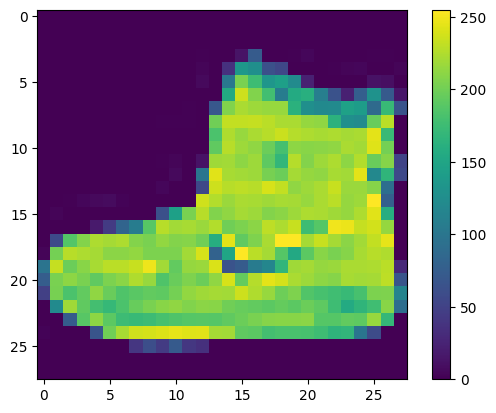

In [101]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

Normalize the data, make them between 0,1

Because each value in range 0,255



In [114]:
train_images = train_images / 255
test_images = test_images / 255

Debug shape of images

In [103]:
test_images.shape

(10000, 28, 28)

In [104]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

**Define class name of classify classes**

Base on the description of the dataset, there are total 10 different classes for clothes

In [105]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

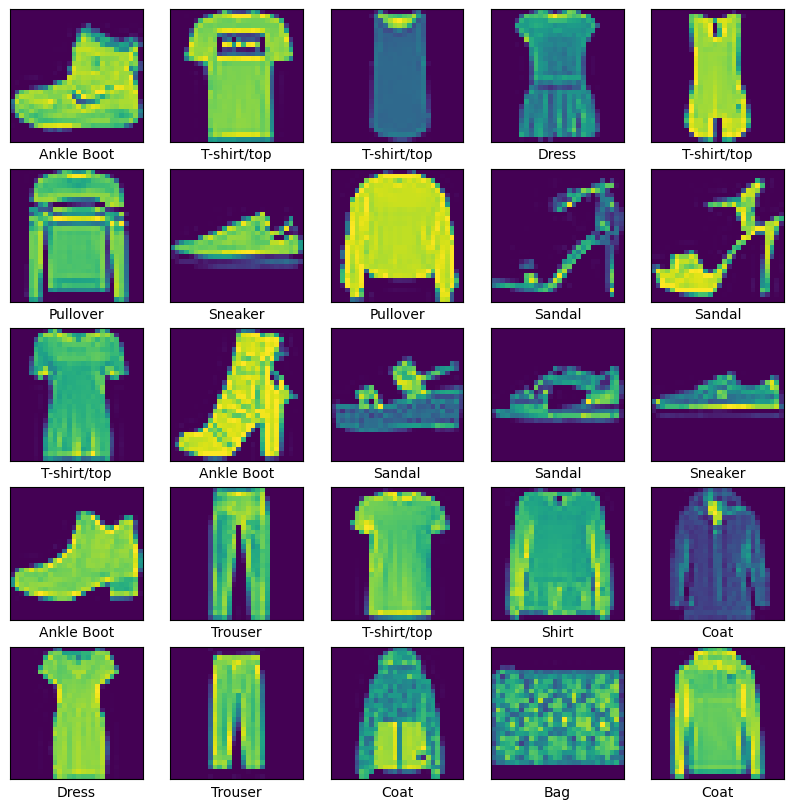

In [106]:
plt.figure(figsize=(10, 10))
for i in range(25): # Show the first 25 items as sample
    plt.subplot(5,5,i+1)      # 5 row 5 column, each row has 5 items
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])

In [107]:
model = keras.Sequential([
    keras.Input(shape=(28,28)), #(28x28)is size of an image, input layer gets size of each image
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)        # Classify into 10 class names
])

In [108]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Correct way in TensorFlow 2.x
    loss="sparse_categorical_crossentropy",  # Fixed typo
    metrics=['accuracy']
)

In [109]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7861 - loss: 0.6215
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8628 - loss: 0.3794
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8769 - loss: 0.3403
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8847 - loss: 0.3131
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8890 - loss: 0.2959


In [110]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8710 - loss: 0.3574
Test Accuracy:  0.8719000220298767
Test Loss:  0.35844022035598755


In [111]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Test output, show the first value of predictions array

In [112]:
np.argmax(predictions[0])

9

Now, plot to see the predictions on different images(here show for 100 images)

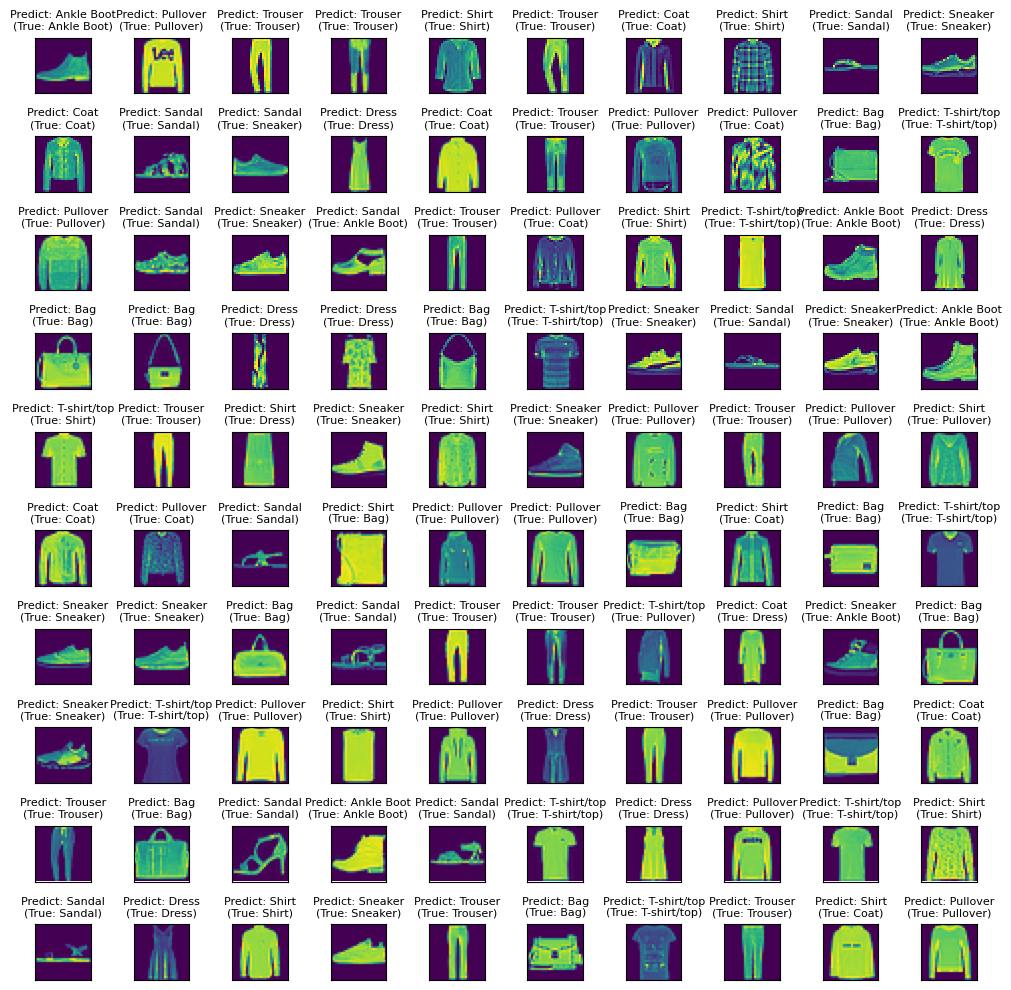

In [118]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1),
    plt.xticks([]),
    plt.yticks([]),
    plt.imshow(test_images[i])
    predicted_label=(np.argmax(predictions[i]))
    true_label=test_labels[i]
    if predicted_label == true_label:
        color="green"
    else:
        color="red"

    plt.title(
        "Predict: {}\n(True: {})".format(
            class_names[predicted_label],
            class_names[true_label],
            color=color
        ),
        fontsize=8
    )

plt.tight_layout()  # adjust distance between subplot to avoid overlap
plt.show()